In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data3 = pd.read_csv('eda_data.csv')
data3.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark_yn,aws_yn,exel_yn,job_simp,seniority,jobc_des,num_Competitors
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,0,data scientist,na,2536,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,1,0,0,data scientist,na,3461,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,0,data scientist,na,2728,3


##### 

- Choosing appropriate Attributes

In [4]:
df_model = data3[['Rating','Size','Type of ownership','Industry', 'Sector', 'Revenue','num_Competitors',
             'Employer Provided Salary', 'hourly', 'State', 'same_state', 'age', 'python_yn',
             'aws_yn', 'exel_yn', 'job_simp','seniority', 'jobc_des','avg_salary']]

###### 

- Creating dummy columns as we've many objective attributes

In [5]:
# get dummy data
dummies = pd.get_dummies(df_model)

In [6]:
dummies

,Rating,num_Competitors,Employer Provided Salary,hourly,same_state,age,python_yn,aws_yn,exel_yn,jobc_des,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_machine learning,job_simp_manager,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3.8,0,0,0,0,49,1,0,0,2536,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,0,0,0,38,1,0,0,4783,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,0,0,1,12,1,0,0,3461,...,0,0,1,0,0,0,0,0,1,0
3,3.8,3,0,0,1,57,1,0,0,3883,...,0,0,1,0,0,0,0,0,1,0
4,2.9,3,0,0,1,24,1,0,0,2728,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,3,0,0,0,192,0,1,0,6162,...,0,0,0,0,0,0,1,0,0,1
738,4.4,3,0,0,0,16,1,1,0,6130,...,0,1,0,0,0,0,0,0,0,1
739,2.6,0,0,0,1,38,0,0,0,3078,...,0,0,0,0,0,0,1,0,1,0
740,3.2,0,0,0,0,-1,0,0,0,1642,...,0,0,0,0,0,1,0,0,1,0


##### 

- Dividing our selected data into train and test data

In [7]:
# train test split
from sklearn.model_selection import train_test_split

X = dummies.drop('avg_salary',axis=1)
Y = dummies['avg_salary'].values

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

###### 

- Checking the first model(**"Linear Regression"**) from statsmodel

In [9]:
# multiple linear regression
import statsmodels.api as sm

In [10]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(Y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.32
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           3.17e-95
Time:                        15:09:07   Log-Likelihood:                -3311.1
No. Observations:                 742   AIC:                             6906.
Df Residuals:                     600   BIC:                             7561.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.4953      6.719      6.622      0.000      31.299      57.692
Rating                                                3.5651      1.932      1.845      0.066      -0.230       7.360
num_Competitors                                       2.3376      0.870      2.687      0.007       0.629       4.046
Employer Provided Salary                             31.2763     11.441      2.734      0.006       8.808      53.745
hourly                                              -36.2935      9.139     -3.971      0.000     -54.241     -18.346
same_state                                            2.5938      2.576      1.007      0.314      -2.466       7.654
age                                                   0.0334      0.030      1.117      0.264      -0.025       0.092
python_yn                                             7.9553      2.487      3.199      0.001       3.072      12.839
aws_yn                                                1.0715      2.693      0.398      0.691      -4.217       6.360
exel_yn                                            9.716e-12   4.83e-12      2.011      0.045    2.27e-13    1.92e-11
jobc_des                                             -0.0002      0.001     -0.264      0.791      -0.002       0.001
Size_-1                                              13.5755      8.608      1.577      0.115      -3.330      30.481
Size_1 to 50 employees                                1.2957      6.492      0.200      0.842     -11.455      14.046
Size_10000+ employees                                -2.9982      5.783     -0.518      0.604     -14.355       8.359
Size_1001 to 5000 employees                           6.0072      3.833      1.567      0.118      -1.521      13.535
Size_201 to 500 employees                             2.4902      3.868      0.644      0.520      -5.105      10.086
Size_5001 to 10000 employees                         -3.9500      5.427     -0.728      0.467     -14.609       6.709
Size_501 to 1000 employees                            2.4270      4.049      0.599      0.549      -5.525      10.379
Size_51 to 200 employees                              4.4807      4.395      1.019      0.308      -4.151      13.112
Size_Unknown                                         21.1674     13.960      1.516      0.130      -6.248      48.583
Type of ownership_-1                                 13.5755      8.608      1.577      0.115      -3.330      30.481
Type of ownership_College / University                6.4301     17.688      0.364      0.716     -28.307      41.167
Type of ownership_Company - Private                   8.4279      5.187      1.625      0.105      -1.759      18.615
Type of ownersh

Above we got the summary and we can visualize it by ckecking 'R-squared'value and p value

###### 

- Now importing Linear Regression from sklearn

In [11]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

In [12]:
model2 = LinearRegression()
model2.fit(X_train,Y_train)

LinearRegression()

Here, we are cross validating our data and on average we are '22K$' off from actual data

In [20]:
np.mean(cross_val_score(model2,X_train,Y_train,scoring='neg_mean_absolute_error',cv=3))/1000000

-20.82645803140382

###### 

-Checking our data on another model which is "**Lasso Regression**"

In [21]:
# lasso regression
model3 = Lasso()
model3.fit(X_train,Y_train)
np.mean(cross_val_score(model3,X_train,Y_train,scoring='neg_mean_absolute_error',cv=3))

-21.118724394210684

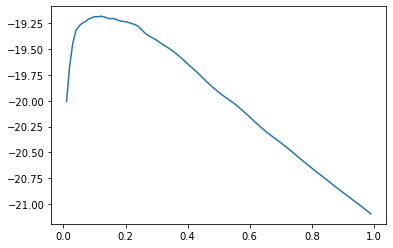

In [22]:
# Trying to get the minimum error
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [23]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
11,0.12,-19.183415


In [24]:
model3 = Lasso(alpha=0.12)
model3.fit(X_train,Y_train)
np.mean(cross_val_score(model3,X_train,Y_train,scoring='neg_mean_absolute_error',cv=3))

-19.18341528114523

Above we can see that setting 'alpha=0.12' can reduce error

###### 

- Importing last model which is "**Random Forest**"

In [25]:
# random forest
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()

np.mean(cross_val_score(model4,X_train,Y_train,scoring='neg_mean_absolute_error',cv=3))

-15.099524731237933

And the error has been reduced and we can say that among all the models "**Random Forest**" works best for our data

###### 

- Find best model using GridSearchCV

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
# tune models through GridsearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(model4,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,Y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [28]:
gs.best_score_

-14.879108209700718

In [29]:
gs.best_estimator_

RandomForestRegressor(criterion='mse', n_estimators=290)

###### 

In [30]:
# test emsembles
ypred_model2 = model2.predict(X_test)
ypred_model3 = model3.predict(X_test)
ypred_model4 = gs.best_estimator_.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test,ypred_model3))
print('-'*20)
print(mean_absolute_error(Y_test,ypred_model4))

19.64764650999091
--------------------
10.828905345984728


######  

- Export the tested model to a pickle file


In [25]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 36.0,
 0.0,
 0.0,
 0.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
